In [2]:
import numpy as np
import matplotlib.pyplot as plt
import SW_functions as sw
import matplotlib.animation as animation
from IPython.display import HTML
import Observables_functions as obs
import data_blockage_errors as error

In [4]:
import sys
sys.setrecursionlimit(10000000)

# Swedensen-Wang algorithm

### Relaxation

CPU times: user 5.19 s, sys: 0 ns, total: 5.19 s
Wall time: 5.18 s


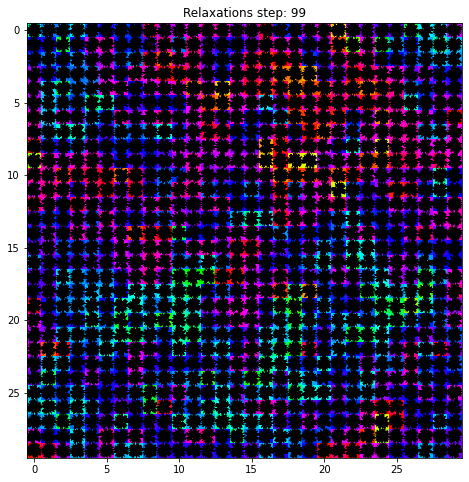

In [52]:
%%time
fig = plt.figure(figsize=(8,8))

L = 30
#spins0 = 2*np.pi*np.ones((L,L))
spins0 = 2*np.pi*np.random.rand(L,L)
spins = sw.get_vector_components(spins0).T
random_vector = sw.get_vector_components(2*np.pi*np.random.rand())

ims = []
new_T = 100

for i in range(100):
    spins, clusters = sw.sw_evolution(spins, T=new_T)
    spins_angle = np.arctan(spins[:,:,1]/spins[:,:,0])-np.pi
    X, Y = np.mgrid[0:L, 0:L]
    U = spins[:,:,0]
    V = spins[:,:,1]
    #ims.append([plt.quiver(X,Y,U,V)])
    #ims.append([plt.imshow(spins_angle)])
    quiver = plt.quiver(X,Y,U,V)
    imsh = plt.imshow(spins_angle,cmap='hsv')
    ims.append([quiver,imsh,plt.title('Relaxations step: '+str(i)),])
    if i==15:
        new_T = 0.5

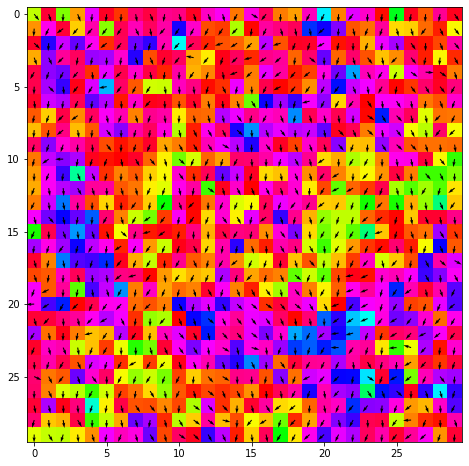

In [50]:
fig = plt.figure(figsize=(8,8))
X, Y = np.mgrid[0:L, 0:L]
U = spins[:,:,0]
V = spins[:,:,1]
    #ims.append([plt.quiver(X,Y,U,V)])
    #ims.append([plt.imshow(spins_angle)])
plt.quiver(X,Y,U,V)
s = spins
spins_angle = np.arctan(s[:,:,1]/s[:,:,0])-np.pi
plt.imshow(spins_angle,cmap='hsv')

## Error comparison with the literature

The first and second rows are taken from the literature, the third and fourth rows corresponds to the SW and MT algorithms

In [4]:
data = np.array([[0.5,0.7054,0.7107],[0.9,0.4427,0.4426],[1.0,0.2971,0.3251],[1.1,0.1148,0.1171],[1.2,0.0512,0.0453],[1.3,0,0.0232],[1.6,0,0.0088]])

In [5]:
np.round(data,decimals=2)

array([[0.5 , 0.71, 0.71],
       [0.9 , 0.44, 0.44],
       [1.  , 0.3 , 0.33],
       [1.1 , 0.11, 0.12],
       [1.2 , 0.05, 0.05],
       [1.3 , 0.  , 0.02],
       [1.6 , 0.  , 0.01]])

In [ ]:
metro = array([[0.5       , 0.68081912, 0.0256017 ],
       [0.57777778, 0.58090905, 0.04095194],
       [0.65555556, 0.55607998, 0.04335207],
       [0.73333333, 0.54069394, 0.01340484],
       [0.81111111, 0.49710473, 0.02433593],
       [0.88888889, 0.4293775 , 0.02643892],
       [0.96666667, 0.31551907, 0.02681525],
       [1.04444444, 0.17585747, 0.06194356],
       [1.12222222, 0.08159082, 0.03646067],
       [1.2       , 0.01394944, 0.00895894]])

In [ ]:
sw = array([[5.00000000e-01, 7.70973182e-01, 1.26775842e-01],
       [5.50000000e-01, 6.10280867e-01, 3.40321063e-02],
       [6.00000000e-01, 5.62381812e-01, 4.53015845e-02],
       [6.50000000e-01, 5.58284939e-01, 2.71863657e-02],
       [7.00000000e-01, 5.33401529e-01, 1.96128521e-02],
       [7.50000000e-01, 4.43844346e-01, 3.49421488e-02],
       [8.00000000e-01, 4.46476441e-01, 7.81793477e-03],
       [8.50000000e-01, 3.76764060e-01, 2.36300794e-02],
       [9.00000000e-01, 3.02079704e-01, 4.79340049e-02],
       [9.50000000e-01, 2.20877458e-01, 5.19291527e-02],
       [1.00000000e+00, 1.00265583e-01, 4.60682504e-02],
       [1.05000000e+00, 2.58056571e-02, 1.66294213e-02],
       [1.10000000e+00, 1.02386367e-02, 6.77707009e-04],
       [1.15000000e+00, 2.29498146e-03, 3.24559391e-03],
       [1.20000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [59]:
tss = np.linspace(0,2,30)

In [ ]:
np.column_stack((tss,np.mean(m_50,axis=1)))

In [53]:
%matplotlib inline
ani = animation.ArtistAnimation(fig, ims, interval=300, blit=True,
                                repeat_delay=1)
HTML(ani.to_html5_video())

## Phase transition

### Magnetization

In [103]:
def sw_algorithm(L,t_i,t_f,t_s,t_relax,t_wait):
    
    spins0 = 2*np.pi*np.ones((L,L))
    #spins0 = 2*np.pi*np.random.rand(L,L)
    spins = sw.get_vector_components(spins0).T
    ts = np.linspace(t_i,t_f,t_s)
    ims = []
    m = []
    en = []
    en2 = []
    for t in ts:
        mag_i = []
        en_i = []
        en2_i = []
        for i in range(t_relax):
            spins, _ = sw.sw_evolution(spins, T=t)
        for j  in range(t_wait):
            spins, _ = sw.sw_evolution(spins, T=t)
            mag = np.sum(spins[:,:,0])**2+np.sum(spins[:,:,1])**2
            mag_i.append(mag/len(spins)**4)
            en_i.append(obs.get_energy(L=L, lattice=spins, J=1))
            en2_i.append(obs.get_energy(L=L, lattice=spins, J=1)**2)
        m.append(mag_i)
        en.append(en_i)
        en2.append(en2_i)
        spins_angle = np.arctan2(spins[:,:,0],spins[:,:,1])
        ims.append([plt.imshow(spins_angle)])
    return m, en, en2, ims, spins

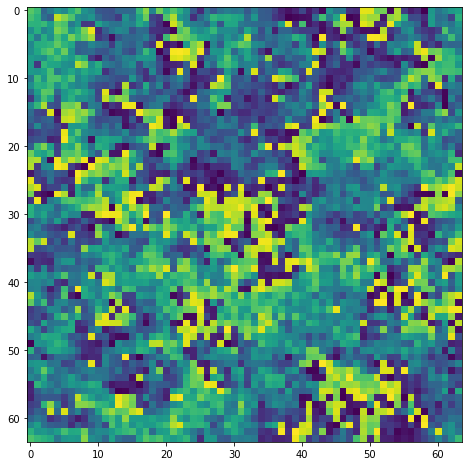

In [104]:
fig = plt.figure(figsize=(8,8))
m, en, en2, ims, spins = sw_algorithm(L=64,t_i=0.5,t_f=1.2,t_s=40,t_relax=10,t_wait=10)

In [114]:
temp_m, m_blocked, error_m, tau_, error_tau = error.get_error_block(obs=np.mean(m,axis=1),T_i=0.5,T_f=1.2,size=10,tau=15)

In [115]:
np.column_stack((temp_m, m_blocked, error_m))

array([[5.00000000e-01, 7.70973182e-01, 1.26775842e-01],
       [5.50000000e-01, 6.10280867e-01, 3.40321063e-02],
       [6.00000000e-01, 5.62381812e-01, 4.53015845e-02],
       [6.50000000e-01, 5.58284939e-01, 2.71863657e-02],
       [7.00000000e-01, 5.33401529e-01, 1.96128521e-02],
       [7.50000000e-01, 4.43844346e-01, 3.49421488e-02],
       [8.00000000e-01, 4.46476441e-01, 7.81793477e-03],
       [8.50000000e-01, 3.76764060e-01, 2.36300794e-02],
       [9.00000000e-01, 3.02079704e-01, 4.79340049e-02],
       [9.50000000e-01, 2.20877458e-01, 5.19291527e-02],
       [1.00000000e+00, 1.00265583e-01, 4.60682504e-02],
       [1.05000000e+00, 2.58056571e-02, 1.66294213e-02],
       [1.10000000e+00, 1.02386367e-02, 6.77707009e-04],
       [1.15000000e+00, 2.29498146e-03, 3.24559391e-03],
       [1.20000000e+00, 0.00000000e+00, 0.00000000e+00]])

/home/juandaanieel/c/TUDelft/AP_master/semester2/CP/project_3/Project-3_kwo/SW_functions.py:45: RuntimeWarning: divide by zero encountered in double_scalars
  p =  1-np.exp(-2*projection/T)
/home/juandaanieel/c/TUDelft/AP_master/semester2/CP/project_3/Project-3_kwo/SW_functions.py:45: RuntimeWarning: divide by zero encountered in double_scalars
  p =  1-np.exp(-2*projection/T)


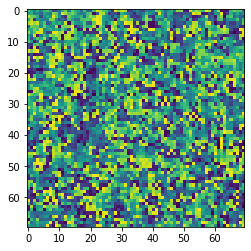

In [12]:
ls = [30,50,70]

In [ ]:
%matplotlib inline
ani = animation.ArtistAnimation(fig, ims, interval=300, blit=True,
                                repeat_delay=1)
HTML(ani.to_html5_video())

## Results for different size

In [19]:
x=np.linspace(0,2,len(np.mean(m_30,axis=1)))

In [ ]:
m_30, en_30, en2_30, _, _ = sw_algorithm(L=30,t_i=0,t_f=2,t_s=30,t_relax=10,t_wait=8)
m_50, en_50, en2_50, _, _ = sw_algorithm(L=50,t_i=0,t_f=2,t_s=30,t_relax=10,t_wait=8)
m_70, en_70, en2_70, _, _ = sw_algorithm(L=70,t_i=0,t_f=2,t_s=30,t_relax=10,t_wait=8)

In [ ]:
m_errors[np.array(m_errors)>0.5] = 0

In [ ]:
plt.scatter(range(len(cv_50)),cv_50)

In [21]:
cv_30 = (np.mean(en2_30,axis=1)-np.mean(np.array(en_30),axis=1)**2)/((30**2*x**2))
cv_50 = (np.mean(en2_50,axis=1)-np.mean(np.array(en_50),axis=1)**2)/((30**2*x**2))
cv_70 = (np.mean(en2_70,axis=1)-np.mean(np.array(en_70),axis=1)**2)/((30**2*x**2))

<ipython-input-21-6bde30e95cc8>:1: RuntimeWarning: invalid value encountered in true_divide
  cv_30 = (np.mean(en2_30,axis=1)-np.mean(np.array(en_30),axis=1)**2)/((30**2*x**2))
<ipython-input-21-6bde30e95cc8>:2: RuntimeWarning: invalid value encountered in true_divide
  cv_50 = (np.mean(en2_50,axis=1)-np.mean(np.array(en_50),axis=1)**2)/((30**2*x**2))
<ipython-input-21-6bde30e95cc8>:3: RuntimeWarning: invalid value encountered in true_divide
  cv_70 = (np.mean(en2_70,axis=1)-np.mean(np.array(en_70),axis=1)**2)/((30**2*x**2))


In [37]:
temp_cv_30, cv_blocked_30, error_cv_30, _, _ = error.get_error_block(obs=cv_30,T_i=0,T_f=2,size=20,tau=15)
temp_cv_50, cv_blocked_50, error_cv_50, _, _ = error.get_error_block(obs=cv_50,T_i=0,T_f=2,size=20,tau=15)
temp_cv_70, cv_blocked_70, error_cv_70, _, _ = error.get_error_block(obs=cv_70,T_i=0,T_f=2,size=20,tau=15)

Text(0, 0.5, '$C_v$')

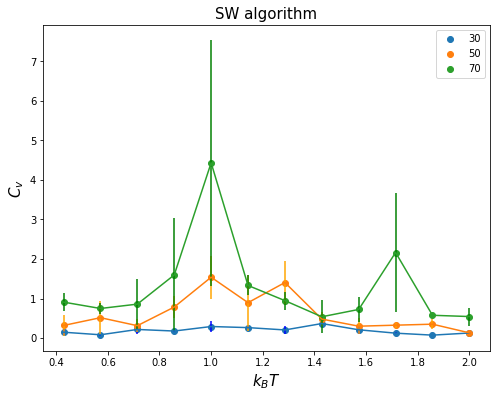

In [40]:
fig = plt.figure(figsize=(8,6))
plt.scatter(temp_cv_30[3:],cv_blocked_30[3:])
plt.errorbar(temp_cv_30[3:],cv_blocked_30[3:],yerr=error_cv_30[3:],ecolor='blue')
plt.scatter(temp_cv_50[3:],cv_blocked_50[3:])
plt.errorbar(temp_cv_50[3:],cv_blocked_50[3:],yerr=error_cv_50[3:],ecolor='orange')
plt.scatter(temp_cv_70[3:],cv_blocked_70[3:])
plt.errorbar(temp_cv_70[3:],cv_blocked_70[3:],yerr=error_cv_70[3:],ecolor='green')
plt.title(r'SW algorithm',size=15)
plt.legend(ls)
plt.xlabel(r'$k_B T$',size=15)
plt.ylabel(r'$C_v$',size=15)

In [ ]:
temp, cv_blocked, error_cv, tau_, error_tau = error.get_error_block(obs=cv,T_i=0,T_f=2,size=10)

In [14]:
temp_m_30, m_30_blocked, error_m_30, tau_, error_tau = error.get_error_block(obs=np.mean(m_30,axis=1),T_i=0,T_f=2,size=10,tau=15)
temp_m_50, m_50_blocked, error_m_50, tau_, error_tau = error.get_error_block(obs=np.mean(m_50,axis=1),T_i=0,T_f=2,size=10,tau=15)
temp_m_70, m_70_blocked, error_m_70, tau_, error_tau = error.get_error_block(obs=np.mean(m_70,axis=1),T_i=0,T_f=2,size=10,tau=15)

In [15]:
m_30_blocked

array([0.99197205, 0.93783676, 0.84634914, 0.74841103, 0.59940139,
       0.5949049 , 0.52778031, 0.33341839, 0.10901874, 0.0270854 ,
       0.01362279, 0.01700374, 0.00927752, 0.00267954, 0.00158626])

In [16]:
error_m_30

array([0.00802795, 0.0178463 , 0.01148854, 0.02524322, 0.05717003,
       0.04125355, 0.06416291, 0.08606106, 0.00636951, 0.00907289,
       0.00574794, 0.00538536, 0.00592063, 0.00113683, 0.00031243])

(0.0, 1.05)

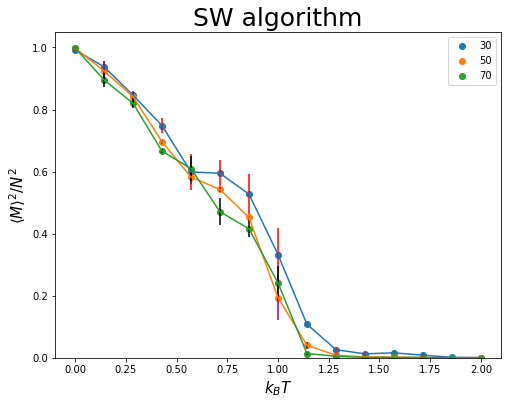

In [17]:
fig = plt.figure(figsize=(8,6))
plt.scatter(temp_m_30,m_30_blocked)
plt.errorbar(temp_m_30,m_30_blocked,yerr=error_m_30,ecolor='red')
plt.scatter(temp_m_50,m_50_blocked)
plt.errorbar(temp_m_50,m_50_blocked,yerr=error_m_50,ecolor='purple')
plt.scatter(temp_m_70,m_70_blocked)
plt.errorbar(temp_m_70,m_70_blocked,yerr=error_m_70,ecolor='black')
plt.legend(ls)
plt.title(r'SW algorithm',size=25)
plt.xlabel(r'$k_B T$',size=15)
plt.ylabel(r'$\langle M\rangle^2/N^2$',size=15)
plt.ylim(0,1.05)

In [34]:
sus_30 = np.nan_to_num((np.mean(m_30,axis=1)-np.mean(np.sqrt(m_30),axis=1)**2)*30**2/x)
sus_50 = np.nan_to_num((np.mean(m_50,axis=1)-np.mean(np.sqrt(m_50),axis=1)**2)*50**2/x)
sus_70 = np.nan_to_num((np.mean(m_70,axis=1)-np.mean(np.sqrt(m_70),axis=1)**2)*70**2/x)

<ipython-input-34-99b6082b5094>:1: RuntimeWarning: divide by zero encountered in true_divide
  sus_30 = np.nan_to_num((np.mean(m_30,axis=1)-np.mean(np.sqrt(m_30),axis=1)**2)*30**2/x)
<ipython-input-34-99b6082b5094>:2: RuntimeWarning: divide by zero encountered in true_divide
  sus_50 = np.nan_to_num((np.mean(m_50,axis=1)-np.mean(np.sqrt(m_50),axis=1)**2)*50**2/x)
<ipython-input-34-99b6082b5094>:3: RuntimeWarning: divide by zero encountered in true_divide
  sus_70 = np.nan_to_num((np.mean(m_70,axis=1)-np.mean(np.sqrt(m_70),axis=1)**2)*70**2/x)


In [35]:
temp_sus_30, sus_30_blocked, error_sus_30, _, _ = error.get_error_block(obs=sus_30,T_i=0,T_f=2,size=10,tau=15)
temp_sus_50, sus_50_blocked, error_sus_50, _, _ = error.get_error_block(obs=sus_50,T_i=0,T_f=2,size=10,tau=15)
temp_sus_70, sus_70_blocked, error_sus_70, _, _ = error.get_error_block(obs=sus_70,T_i=0,T_f=2,size=10,tau=15)

/home/juandaanieel/bin/anaconda3/envs/qiskit/lib/python3.8/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


(0.0, 25.0)

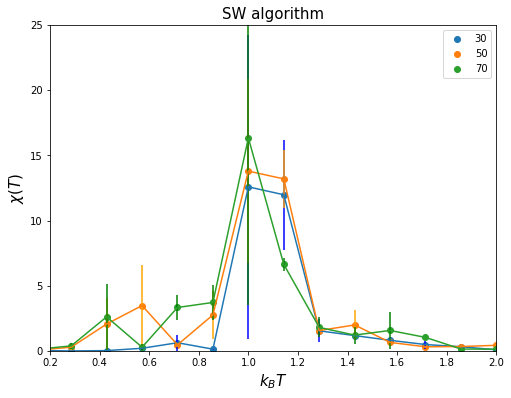

In [44]:
fig = plt.figure(figsize=(8,6))
plt.scatter(temp_sus_30,sus_30_blocked)
plt.errorbar(temp_sus_30,sus_30_blocked,yerr=error_sus_30,ecolor='blue')
plt.scatter(temp_sus_50,sus_50_blocked)
plt.errorbar(temp_sus_50,sus_50_blocked,yerr=error_sus_50,ecolor='orange')
plt.scatter(temp_sus_70,sus_70_blocked)
plt.errorbar(temp_sus_70,sus_70_blocked,yerr=error_sus_70,ecolor='green')
plt.legend(ls)
plt.title(r'SW algorithm',size=15)
plt.xlabel(r'$k_B T$',size=15)
plt.ylabel(r'$\chi(T)$',size=15)
plt.xlim(0.2,2)
plt.ylim(0,25)